<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/ResNet50_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets.fashion_mnist import load_data
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.applications.resnet import ResNet50, preprocess_input
from keras.utils import to_categorical
import cv2
from sklearn.metrics import confusion_matrix
from keras.datasets.cifar10 import load_data

170500096/170498071 [==============================] - 2s 0us/step
data loaded
(50000, 32, 32, 3)


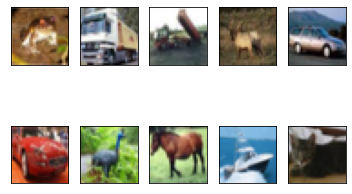

In [2]:
(xtrain, ytrain),(xtest, ytest)=load_data()
print('data loaded')

print(xtrain.shape)

# create a grid of 2x5 images for 10 classes
for i in range(0, 10):
  ax = plt.subplot(2,5,1 + i)
  plt.imshow(xtrain[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

# show the plot
plt.show()

# xtrain = preprocess_input(xtrain)
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [3]:
model = Sequential()
model.add(ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3)))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.layers[0].trainable = False

model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 25,818,378
Trainable params: 2,230,666
Non-

Epoch 1/50
196/196 - 7s - loss: 1.6192 - accuracy: 0.4701 - val_loss: 1.1997 - val_accuracy: 0.5814
Epoch 2/50
196/196 - 6s - loss: 1.2177 - accuracy: 0.5699 - val_loss: 1.1300 - val_accuracy: 0.6042
Epoch 3/50
196/196 - 6s - loss: 1.1235 - accuracy: 0.6029 - val_loss: 1.0887 - val_accuracy: 0.6196
Epoch 4/50
196/196 - 6s - loss: 1.0581 - accuracy: 0.6246 - val_loss: 1.0741 - val_accuracy: 0.6242
Epoch 5/50
196/196 - 6s - loss: 1.0036 - accuracy: 0.6441 - val_loss: 1.0603 - val_accuracy: 0.6338
Epoch 6/50
196/196 - 6s - loss: 0.9598 - accuracy: 0.6591 - val_loss: 1.0507 - val_accuracy: 0.6362
Epoch 7/50
196/196 - 6s - loss: 0.9135 - accuracy: 0.6730 - val_loss: 1.0483 - val_accuracy: 0.6383
Epoch 8/50
196/196 - 6s - loss: 0.8806 - accuracy: 0.6851 - val_loss: 1.0466 - val_accuracy: 0.6399
Epoch 9/50
196/196 - 6s - loss: 0.8408 - accuracy: 0.6966 - val_loss: 1.0368 - val_accuracy: 0.6464
Epoch 10/50
196/196 - 6s - loss: 0.8114 - accuracy: 0.7094 - val_loss: 1.0555 - val_accuracy: 0.6462

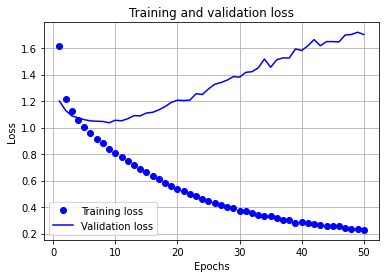

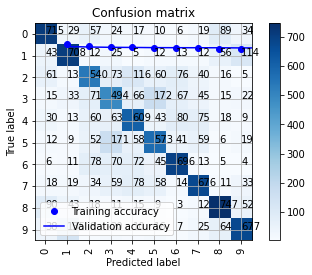

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(xtrain, ytrain, batch_size=256, epochs=50, validation_data=(xtest, ytest), verbose=2, shuffle=True)

print(hist.history.keys())
loss = hist.history['loss']
print(np.mean(loss))
accuracy = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_accuracy = hist.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

ypred = model.predict(xtest)
score = model.evaluate(xtest, ytest)
print('accuracy :', score)

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

cm_labels = ['0','1','2','3','4','5','6','7','8','9']
cm = confusion_matrix(np.argmax(ytest, axis=1), np.argmax(model.predict(xtest), axis=1))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
indexes = np.arange(len(cm_labels))
for i in indexes:
  for j in indexes:
    plt.text(j, i, cm[i, j])
plt.xticks(indexes, cm_labels, rotation=90)
plt.xlabel('Predicted label')
plt.yticks(indexes, cm_labels)
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()